In [68]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [216]:
csv_file = "./drive/MyDrive/Kaggle_Data/benh_tim.csv"
df = pd.read_csv(csv_file)
df

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,NaN,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
916,57,F,ATA,130.0,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138.0,175,0,Normal,173,N,0.0,Up,0
918,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
919,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0


In [217]:
df.isnull().sum()

a         0
s         0
cpt       2
r-bp      3
cho       0
fbs       0
r-ecg     0
m-hr      0
ea        0
o-peak    0
s-ts      0
hd        0
dtype: int64

In [250]:
# 01 Tính tỉ lệ phần trăm nam giới mắc bệnh tim.
df_1 = df[df['hd'] == 1]
len(df_1)
df_M = df_1[df_1['s'] == 'M']
len(df_M)
percentage = len(df_M)*100/len(df_1)
percentage

90.15748031496064

In [251]:
# 02: Liệt kê tuổi, giới tính và tình trạng (mắc/không mắc bệnh tim) của những người có nhịp tim tối đa thấp nhất.
mhr_min=df['m-hr'].min()
print(mhr_min)

60


In [252]:
# 02: Liệt kê tuổi, giới tính và tình trạng (mắc/không mắc bệnh tim) của những người có nhịp tim tối đa thấp nhất.
df_mhr_min = df[df['m-hr'] == 60]
print(df_mhr_min[['a','s','hd']])


      a  s  hd
390  51  M   1


In [253]:
# 03 : Đếm số người không mắc bệnh tim theo từng loại đau thắt ngực.
df_0 = df[df['hd'] == 0]
df_0

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
910,41,M,ATA,120.0,157,0,Normal,182,N,0.0,Up,0
917,38,M,NAP,138.0,175,0,Normal,173,N,0.0,Up,0
918,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
919,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0


In [254]:
# 03 : Đếm số người không mắc bệnh tim theo từng loại đau thắt ngực.
# loai TA
n_TA = len(df_0[df_0['cpt'] == 'TA'])
n_TA

26

In [255]:
# 03 : Đếm số người không mắc bệnh tim theo từng loại đau thắt ngực.
# loai ATA
n_ATA = len(df_0[df_0['cpt'] == 'ATA'])
n_ATA

151

In [256]:
# 03 : Đếm số người không mắc bệnh tim theo từng loại đau thắt ngực.
# loai NAP
n_NAP = len(df_0[df_0['cpt'] == 'NAP'])
n_NAP

132

In [257]:
# 03 : Đếm số người không mắc bệnh tim theo từng loại đau thắt ngực.
# loai ASY
n_ASY = len(df_0[df_0['cpt'] == 'ASY'])
n_ASY

104

In [258]:
# 04 :  Vẽ biểu đồ pie thể hiện tỉ lệ phần trăm theo giới tính của những người trên 40 tuổi không mắc bệnh tim.
# Danh sach nhung nguoi tren 40 tuoi khong mac benh tim
df_0_over40s = df_0[df_0['a'] > 40]
df_0_over40s

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120.0,284,0,Normal,120,N,0.0,Up,0
14,42,F,NAP,115.0,211,0,ST,137,N,0.0,Up,0
15,54,F,ATA,120.0,273,0,Normal,150,N,1.5,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130.0,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120.0,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132.0,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120.0,157,0,Normal,182,N,0.0,Up,0


In [259]:
# Pie
px.pie(df_0_over40s['s'],names='s', title ='Tỉ lệ Female và Male không mắc bệnh tim')

In [260]:
# 05: Hiển thị các hàng dữ liệu bị trùng lặp, sau đó thực hiện loại bỏ chúng.
# Hiển thị các hàng dữ liệu bị trùng lặp

duplicate = df[df.duplicated(keep= False)]
duplicate

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
918,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
919,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
920,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [261]:
# 05: Hiển thị các hàng dữ liệu bị trùng lặp, sau đó thực hiện loại bỏ chúng.
# sau đó thực hiện loại bỏ chúng.
df = df.drop_duplicates()
df


,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,NaN,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236,0,LVH,174,N,0.0,Flat,1


In [262]:
df.describe()

,a,r-bp,cho,fbs,m-hr,o-peak,hd
count,918.000000,915.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.733115,132.397814,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.594317,18.544500,109.384145,0.423046,25.460334,1.066570,0.497414
min,-5.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,300.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [263]:
# 06 Loại bỏ outliers trên cột tuổi sử dụng interquatile range với hệ số k = 2. Loại bỏ các hàng có r-bp là 0.
def get_boundarires(col,k =2): 
  q1,q3 = np.nanpercentile(col,[25,75])
  cut_off = (q3- q1)*k
  return q1- cut_off, q3 + cut_off
lower, upper = get_boundarires(df.a, 2)
df = df[(df.a >= lower) & (df.a <= upper)]
df

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,NaN,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236,0,LVH,174,N,0.0,Flat,1


In [264]:
# 06 Loại bỏ các hàng có r-bp là 0.
df[df['r-bp'] == 0]

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
449,55,M,NAP,0.0,0,0,Normal,155,N,1.5,Flat,1


In [265]:
# 06 Loại bỏ các hàng có r-bp là 0.
df.drop(df[df['r-bp'] == 0].index,inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [266]:
# 06 Loại bỏ các hàng có r-bp là 0.
df

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,NaN,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236,0,LVH,174,N,0.0,Flat,1


In [267]:
# 07 : Phát hiện và xử lý missing data : 
df.isnull().sum()

a         0
s         0
cpt       1
r-bp      3
cho       0
fbs       0
r-ecg     0
m-hr      0
ea        0
o-peak    0
s-ts      0
hd        0
dtype: int64

In [268]:
# 07 : Phát hiện và xử lý missing data : 
# Xử lý data r-bp by mean()
df.iloc[:,[2,3]] = df.iloc[:,[2,3]].fillna(df.iloc[:,[2,3]].mean())
df.iloc[:,[2,3]]

<ipython-input-268-a3c0a3b06b2c>:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cpt,r-bp
0,ATA,140.0
1,NAP,160.0
2,ATA,130.0
3,NaN,138.0
4,NAP,150.0
...,...,...
913,TA,110.0
914,ASY,144.0
915,ASY,130.0
916,ATA,130.0


In [269]:
# Xử lý data'cpt' by droping na
df.isnull().sum()

a         0
s         0
cpt       1
r-bp      0
cho       0
fbs       0
r-ecg     0
m-hr      0
ea        0
o-peak    0
s-ts      0
hd        0
dtype: int64

In [270]:
# Xử lý data'cpt' by droping na
df = df.dropna()
df 

,a,s,cpt,r-bp,cho,fbs,r-ecg,m-hr,ea,o-peak,s-ts,hd
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236,0,LVH,174,N,0.0,Flat,1


In [271]:
# 08 Chuyển dữ liệu dạng categorical sang numerical
dataset = pd.get_dummies(df, drop_first=True)
print(dataset.head())
print(dataset.shape)

    a   r-bp  cho  fbs  m-hr  o-peak  hd  s_M  cpt_ATA  cpt_NAP  cpt_TA  \
0  40  140.0  289    0   172     0.0   0    1        1        0       0   
1  49  160.0  180    0   156     1.0   1    0        0        1       0   
2  37  130.0  283    0    98     0.0   0    1        1        0       0   
4  54  150.0  195    0   122     0.0   0    1        0        1       0   
5  39  120.0  339    0   170     0.0   0    1        0        1       0   

   r-ecg_Normal  r-ecg_ST  ea_Y  s-ts_Flat  s-ts_Up  
0             1         0     0          0        1  
1             1         0     0          1        0  
2             0         1     0          0        1  
4             1         0     0          0        1  
5             1         0     0          0        1  
(914, 16)


In [272]:
# 09 Chia dữ liệu thành hai tập train, test theo tỉ lệ 4:1 và chuẩn hoá dữ liệu về standard normal distribution :
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.model_selection 

In [273]:
# Chia dữ liệu thành hai tập train, test theo tỉ lệ 4:1
# Dữ liệu đầu vào X, y 
X = dataset.drop('hd',axis = 1)
y = dataset['hd'].values
print(X.shape, y.shape)

(914, 15) (914,)


In [274]:
# Chia dữ liệu thành hai tập train, test theo tỉ lệ 4:1
Xtrain, Xtest, ytrain, ytest = train_test_split( X,y, test_size = 0.25, random_state = 2) 
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)
print(Xtrain[:5])

(685, 15) (229, 15) (685,) (229,)
      a   r-bp  cho  fbs  m-hr  o-peak  s_M  cpt_ATA  cpt_NAP  cpt_TA  \
216  39  110.0  280    0   150     0.0    1        0        0       0   
205  50  150.0  215    0   140     0.0    1        0        0       0   
378  70  140.0    0    1   157     2.0    1        0        0       0   
844  52  118.0  186    0   190     0.0    1        0        0       1   
122  46  110.0  240    0   140     0.0    1        0        0       0   

     r-ecg_Normal  r-ecg_ST  ea_Y  s-ts_Flat  s-ts_Up  
216             1         0     0          1        0  
205             1         0     1          0        1  
378             1         0     1          1        0  
844             0         0     0          1        0  
122             0         1     0          0        1  


In [275]:
# và chuẩn hoá dữ liệu về standard normal distribution :
scaler = preprocessing.StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)
print(Xtrain[:5])

[[-1.55953174 -1.23530622  0.73690403 -0.55430308  0.51588343 -0.82028255
   0.50910822 -0.47707292 -0.54754931 -0.22853302  0.82147223 -0.49771793
  -0.81898212  1.01916165 -0.88798184]
 [-0.35909537  0.98141576  0.13652613 -0.55430308  0.12471656 -0.82028255
   0.50910822 -0.47707292 -0.54754931 -0.22853302  0.82147223 -0.49771793
   1.22102788 -0.98119861  1.12614916]
 [ 1.82351623  0.42723526 -1.8493392   1.80406718  0.78970024  1.06589921
   0.50910822 -0.47707292 -0.54754931 -0.22853302  0.82147223 -0.49771793
   1.22102788  1.01916165 -0.88798184]
 [-0.14083421 -0.79196182 -0.13133477 -0.55430308  2.08055092 -0.82028255
   0.50910822 -0.47707292 -0.54754931  4.37573523 -1.2173266  -0.49771793
  -0.81898212  1.01916165 -0.88798184]
 [-0.79561769 -1.23530622  0.36744071 -0.55430308  0.12471656 -0.82028255
   0.50910822 -0.47707292 -0.54754931 -0.22853302 -1.2173266   2.00917015
  -0.81898212 -0.98119861  1.12614916]]


In [276]:
# 10 Chọn, huấn luyện mô hình phù hợp và hiển thị confusion matrix, PRF trên tập test.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

LogisticRegression()

In [277]:
y_pred = lr.predict(Xtest)
print(y_pred[:5])
print(ytest[:5])

[1 1 1 1 1]
[0 1 0 1 1]


In [278]:
accuracy_score(ytest, y_pred)

0.8558951965065502

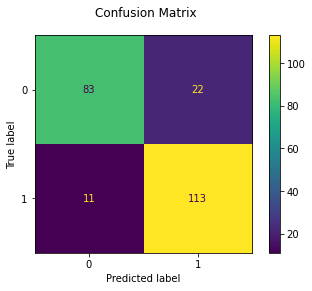

In [279]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, y_pred)
disp.figure_.suptitle("Confusion Matrix")
disp.text_ = ""

In [280]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       105
           1       0.84      0.91      0.87       124

    accuracy                           0.86       229
   macro avg       0.86      0.85      0.85       229
weighted avg       0.86      0.86      0.85       229



In [281]:
print(metrics.precision_recall_fscore_support(ytest, y_pred))

(array([0.88297872, 0.83703704]), array([0.79047619, 0.91129032]), array([0.83417085, 0.87258687]), array([105, 124]))


In [282]:
print(*ytest)
print(*y_pred)

0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1
1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1


In [283]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(ytest, y_pred)

(array([0.88297872, 0.83703704]),
 array([0.79047619, 0.91129032]),
 array([0.83417085, 0.87258687]),
 array([105, 124]))

In [284]:
np.unique(ytest, return_counts=True)

(array([0, 1]), array([105, 124]))